# Data Cleaning Processes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Customer Dataset

In [2]:
df1 = pd.read_csv(r"C:\Users\Chinemelum\MyAruDatabases\customers.csv")

In [3]:
df1.info()
# this provide insights on the datatypes and requirement for the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  30 non-null     int64  
 1   name         30 non-null     object 
 2   email        29 non-null     object 
 3   gender       30 non-null     object 
 4   age          29 non-null     float64
 5   location     30 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.5+ KB


In [4]:
df1.describe()
#provides summary statistics of the dataset before any cleaning exercise is carried out.

,customer_id,age
count,30.000000,29.000000
mean,15.500000,44.965517
std,8.803408,14.568760
min,1.000000,27.000000
25%,8.250000,33.000000
50%,15.500000,45.000000
75%,22.750000,54.000000
max,30.000000,83.000000


In [5]:
df1.isnull().sum()
#To check for missing values

customer_id    0
name           0
email          1
gender         0
age            1
location       0
dtype: int64

In [6]:
df1.columns[df1.isnull().any()]

Index(['email', 'age'], dtype='object')

In [7]:
df1[df1.isnull().any(axis = 1)]

,customer_id,name,email,gender,age,location
2,3,Mike Brown,mike.brown@example.com,M,NaN,Chicago
3,4,Lisa Ray,NaN,F,35.0,San Francisco


In [8]:
df1.head()
#provides an overview of the dataset

,customer_id,name,email,gender,age,location
0,1,John Doe,john.doe@example.com,M,30.0,New York
1,2,Jane Smith,jane.smith@example.com,F,28.0,los angeles
2,3,Mike Brown,mike.brown@example.com,M,NaN,Chicago
3,4,Lisa Ray,NaN,F,35.0,San Francisco
4,5,Tom Hanks,tom.hanks@example.com,M,45.0,New york


#### From the above, there is the need to fill in missing values in email and age column, convert the datatype of the age column and use a consistent sentence casing for the location column 

## Data Cleaning Activities


#### For Missing Values

In [9]:
df1['email'].fillna('Unknown@example.com', inplace = True)
df1

# this replaces missing values with unknown@example.com

,customer_id,name,email,gender,age,location
0,1,John Doe,john.doe@example.com,M,30.0,New York
1,2,Jane Smith,jane.smith@example.com,F,28.0,los angeles
2,3,Mike Brown,mike.brown@example.com,M,NaN,Chicago
3,4,Lisa Ray,Unknown@example.com,F,35.0,San Francisco
4,5,Tom Hanks,tom.hanks@example.com,M,45.0,New york
5,6,Sara Connor,sara.connor@example.com,F,32.0,Boston
6,7,David Lee,david.lee@example.com,M,40.0,Miami
7,8,Emma Watson,emma.watson@example.com,F,27.0,London
8,9,Mark Davis,mark.davis@example,M,38.0,Chicago
9,10,Anna Bell,anna.bell@example.com,F,29.0,san francisco


In [10]:
# For the missing age, we use the mean to interpolate 

mean_age = df1['age'].mean()
df1['age'].fillna(mean_age, inplace = True)
df1

,customer_id,name,email,gender,age,location
0,1,John Doe,john.doe@example.com,M,30.000000,New York
1,2,Jane Smith,jane.smith@example.com,F,28.000000,los angeles
2,3,Mike Brown,mike.brown@example.com,M,44.965517,Chicago
3,4,Lisa Ray,Unknown@example.com,F,35.000000,San Francisco
4,5,Tom Hanks,tom.hanks@example.com,M,45.000000,New york
5,6,Sara Connor,sara.connor@example.com,F,32.000000,Boston
6,7,David Lee,david.lee@example.com,M,40.000000,Miami
7,8,Emma Watson,emma.watson@example.com,F,27.000000,London
8,9,Mark Davis,mark.davis@example,M,38.000000,Chicago
9,10,Anna Bell,anna.bell@example.com,F,29.000000,san francisco


#### For converting datatype

In [11]:
df1['age'].dtype

dtype('float64')

In [12]:
df1['age'] = df1['age'].astype(int)
df1['age'].dtype

dtype('int32')

#### For consistent sentence casing

In [13]:
df1['location'] = df1['location'].str.title()
df1

,customer_id,name,email,gender,age,location
0,1,John Doe,john.doe@example.com,M,30,New York
1,2,Jane Smith,jane.smith@example.com,F,28,Los Angeles
2,3,Mike Brown,mike.brown@example.com,M,44,Chicago
3,4,Lisa Ray,Unknown@example.com,F,35,San Francisco
4,5,Tom Hanks,tom.hanks@example.com,M,45,New York
5,6,Sara Connor,sara.connor@example.com,F,32,Boston
6,7,David Lee,david.lee@example.com,M,40,Miami
7,8,Emma Watson,emma.watson@example.com,F,27,London
8,9,Mark Davis,mark.davis@example,M,38,Chicago
9,10,Anna Bell,anna.bell@example.com,F,29,San Francisco


In [14]:
df1.describe()

,customer_id,age
count,30.000000,30.000000
mean,15.500000,44.933333
std,8.803408,14.316456
min,1.000000,27.000000
25%,8.250000,33.250000
50%,15.500000,44.500000
75%,22.750000,53.500000
max,30.000000,83.000000


#### This dataset is now ready for advanced analysis, it has been cleaned by inputing missing values, ensuring consistent sentence and appropriate data types. It is now to be saved and used for further analysis


#### To save the cleaned dataset:

In [15]:
df1.to_csv(r"C:\Users\Chinemelum\MyAruDatabases\cleaned_customerdata.csv")

## Summary of customer demographics

In [16]:
df1['age'].value_counts().sort_index()

age
27    1
28    1
29    1
30    2
31    1
32    1
33    1
34    1
35    2
36    1
38    1
40    1
44    1
45    3
47    1
52    3
54    1
55    1
57    1
58    1
59    1
70    1
72    1
83    1
Name: count, dtype: int64

In [17]:
df1['gender'].value_counts()

gender
M    16
F    14
Name: count, dtype: int64

In [18]:
df1['location'].value_counts()

location
Los Angeles      9
New York         7
Chicago          5
Boston           3
San Francisco    2
London           2
Miami            1
Philadelphia     1
Name: count, dtype: int64

### Transaction Dataset

In [19]:
df2 = pd.read_csv(r"C:\Users\Chinemelum\MyAruDatabases\transactions.csv")

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    45 non-null     int64  
 1   customer_id       45 non-null     int64  
 2   product_id        45 non-null     int64  
 3   quantity          44 non-null     float64
 4   price             40 non-null     float64
 5   transaction_date  45 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 2.2+ KB


In [21]:
df2.describe()

,transaction_id,customer_id,product_id,quantity,price
count,45.000000,45.000000,45.000000,44.000000,40.000000
mean,22.888889,12.888889,107.333333,1.704545,34.490000
std,13.292551,8.493908,4.954337,0.851252,28.633851
min,1.000000,1.000000,101.000000,1.000000,7.990000
25%,12.000000,6.000000,103.000000,1.000000,14.990000
50%,23.000000,12.000000,106.000000,1.500000,22.990000
75%,34.000000,19.000000,111.000000,2.000000,39.990000
max,45.000000,30.000000,118.000000,4.000000,129.990000


In [22]:
df2.isnull().sum()

transaction_id      0
customer_id         0
product_id          0
quantity            1
price               5
transaction_date    0
dtype: int64

In [23]:
df2[df2.isnull().any(axis =1)]

,transaction_id,customer_id,product_id,quantity,price,transaction_date
7,8,8,103,2.0,NaN,2023-01-12
10,11,11,101,NaN,19.99,2023-01-17
15,16,16,106,1.0,NaN,2023-01-21
23,24,24,114,1.0,NaN,2023-01-28
30,31,1,106,1.0,NaN,2023-02-03
38,39,9,114,1.0,NaN,2023-02-09


In [24]:
df2.head()

,transaction_id,customer_id,product_id,quantity,price,transaction_date
0,1,1,101,2.0,19.99,2023-01-05
1,2,2,102,1.0,29.99,05-01-2023
2,3,3,103,3.0,9.99,2023/01/07
3,4,4,104,2.0,14.99,2023-01-09
4,5,5,105,1.0,39.99,2023-01-10


In [25]:
df2.duplicated().sum()
#To check for duplicates

1

In [26]:
df2[df2.duplicated()]

,transaction_id,customer_id,product_id,quantity,price,transaction_date
6,2,2,102,1.0,29.99,05-01-2023


### Data Cleaning

#### Drop Duplicates

In [27]:
df2 = df2.drop_duplicates()
df2.duplicated().sum()

0

#### Data Formating

#### standardizing date format

In [28]:
df2['transaction_date'] = pd.to_datetime(df2['transaction_date'], errors='coerce')
# the conversion to datetime resulted in some records not being recognised as datetime, thus the missing values are interpolated
df2['transaction_date'] = df2['transaction_date'].interpolate(method = 'linear')
# the above code introduces a timestamp to the column which is not needed for our analysis
df2['transaction_date'] = df2['transaction_date'].dt.date
df2

,transaction_id,customer_id,product_id,quantity,price,transaction_date
0,1,1,101,2.0,19.99,2023-01-05
1,2,2,102,1.0,29.99,2023-01-06
2,3,3,103,3.0,9.99,2023-01-07
3,4,4,104,2.0,14.99,2023-01-09
4,5,5,105,1.0,39.99,2023-01-10
5,6,6,101,2.0,19.99,2023-01-05
7,8,8,103,2.0,NaN,2023-01-12
8,9,9,104,1.0,14.99,2023-01-14
9,10,10,105,3.0,39.99,2023-01-16
10,11,11,101,NaN,19.99,2023-01-17


#### Missing Values

####  the price and qantity columns have missing values in them, mean and median were used to fill them up

In [29]:
mean_qty = df2['quantity'].mean()

df2['quantity'].fillna(mean_qty, inplace = True)

In [30]:
median_price = df2['price'].median()
df2['price'].fillna(median_price, inplace = True)

#### Converting Data type

#### The quantity datatype needs to be converted to an interger datatype given the dataset

In [31]:
df2['quantity'] = df2['quantity'].astype(int)

In [32]:
print(df2)

    transaction_id  customer_id  product_id  quantity   price transaction_date
0                1            1         101         2   19.99       2023-01-05
1                2            2         102         1   29.99       2023-01-06
2                3            3         103         3    9.99       2023-01-07
3                4            4         104         2   14.99       2023-01-09
4                5            5         105         1   39.99       2023-01-10
5                6            6         101         2   19.99       2023-01-05
7                8            8         103         2   22.99       2023-01-12
8                9            9         104         1   14.99       2023-01-14
9               10           10         105         3   39.99       2023-01-16
10              11           11         101         1   19.99       2023-01-17
11              12           12         102         2   29.99       2023-01-17
12              13           13         103         

#### The transaction dataset is cleaned and ready to be saved for further data analysis.

In [33]:
df2.describe()

,transaction_id,customer_id,product_id,quantity,price
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,23.363636,13.136364,107.454545,1.704545,33.285455
std,13.054610,8.426401,4.943657,0.851252,27.514545
min,1.000000,1.000000,101.000000,1.000000,7.990000
25%,12.750000,6.000000,103.750000,1.000000,14.990000
50%,23.500000,12.000000,106.000000,1.500000,22.990000
75%,34.250000,19.250000,111.250000,2.000000,39.990000
max,45.000000,30.000000,118.000000,4.000000,129.990000


In [34]:
df2.to_csv(r"C:\Users\Chinemelum\MyAruDatabases\transactionsdata.csv")

### Infographics

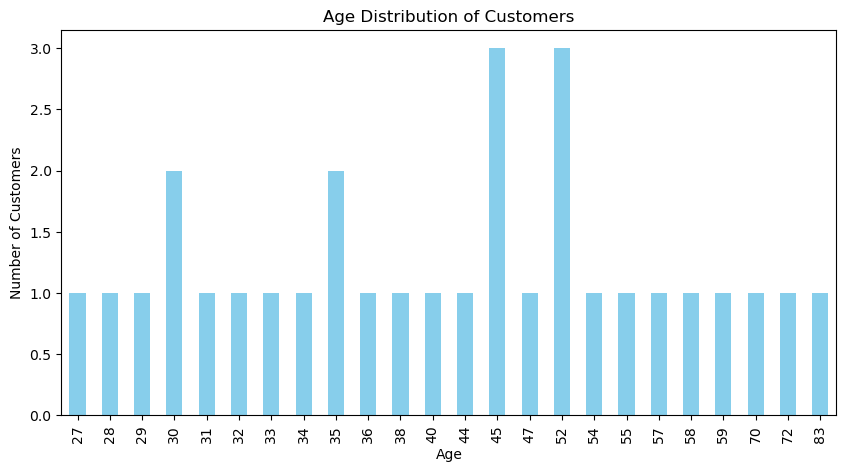

In [35]:
#Age Distribution

age_distribution = df1['age'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
age_distribution.plot(kind='bar', color='skyblue') 
plt.title('Age Distribution of Customers') 
plt.xlabel('Age') 
plt.ylabel('Number of Customers')
plt.show()

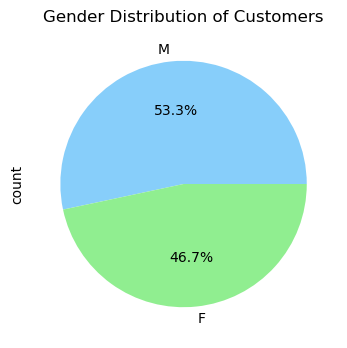

In [39]:
#Gender Distribution
gender_distribution = df1['gender'].value_counts()
plt.figure(figsize=(4,4))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightskyblue', 'lightgreen'])
plt.title('Gender Distribution of Customers')
plt.show()

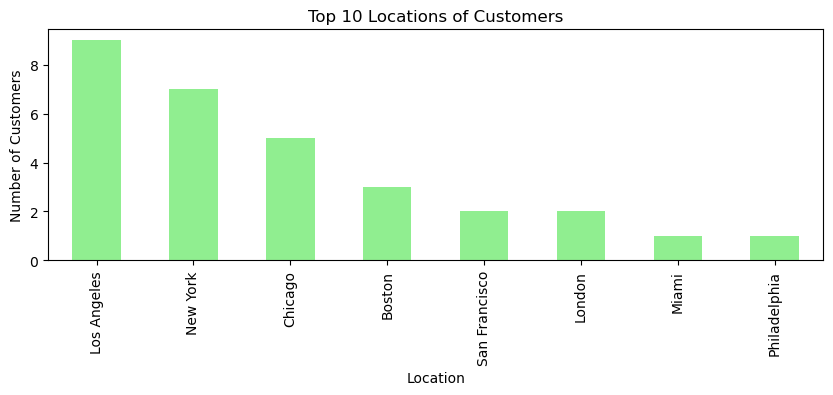

In [42]:
#Location Breakdown
location_distribution = df1['location'].value_counts().head(10)
plt.figure(figsize=(10, 3))
location_distribution.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Locations of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.show()

In [38]:
#Displaying statistics
total_customers = df1['customer_id'].nunique()
average_age = df1['age'].mean()

print(f"Total Number of Customers: {total_customers}")
print(f"Average Age of Customers: {average_age:.2f}")
print("Gender Distribution:")
print(gender_distribution)
print("Top 10 Locations:")
print(location_distribution)

Total Number of Customers: 30
Average Age of Customers: 44.93
Gender Distribution:
gender
M    16
F    14
Name: count, dtype: int64
Top 10 Locations:
location
Los Angeles      9
New York         7
Chicago          5
Boston           3
San Francisco    2
London           2
Miami            1
Philadelphia     1
Name: count, dtype: int64
